# MLPRegressor

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Zad.

Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

In [2]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))

# Zadanie
Wykonaj regresję z różnymi parametrami.

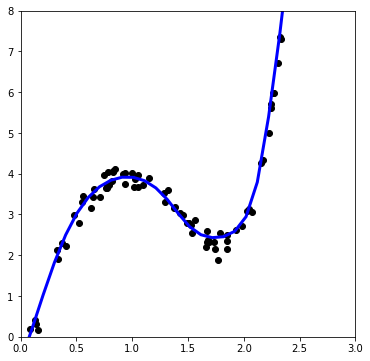

In [3]:
x=np.vstack(x)
x_plot = np.vstack(np.linspace(0, 10, 100))

MLP = MLPRegressor(hidden_layer_sizes=(100, 50, 10), activation='tanh', max_iter=50000, batch_size=20, learning_rate_init=0.001, learning_rate="adaptive", solver='adam')
y_rbf = MLP.fit(x,y)

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, MLP.predict(x_plot), color='blue',linewidth=3)
plt.show()



In [4]:
from sklearn import  metrics

metrics.r2_score(y, MLP.predict(x))

0.9875256251143476

# Zad. 
Wykonaj walidecję krzyżową.

In [6]:
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
MLP = MLPRegressor(hidden_layer_sizes=(100, 50, 10), activation='tanh', max_iter=50000, batch_size=20, learning_rate_init=0.001, learning_rate="adaptive", solver='adam')
MLP.fit(X_train, y_train)
ms.cross_val_score(MLP, X_test, y_test, cv=5)

C:\Users\zwato\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\zwato\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\zwato\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\zwato\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\

array([0.60871   , 0.60421003, 0.61904592, 0.58093128, 0.96747066])

# Zad.
wykonaj walidację krzyżową dla modelu MLPRegressor


In [8]:
import pandas as pd
df_adv = pd.read_csv('./Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [16]:
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grid = GridSearchCV(MLPRegressor(hidden_layer_sizes=(100, 50, 10), activation='tanh', max_iter=50000, batch_size=20, learning_rate_init=0.001, learning_rate="adaptive", solver='adam'),
                            {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                            cv=5)
grid.fit(X_train, y_train)
ms.cross_val_score(grid, X_test, y_test, cv=5)

array([0.64811038, 0.1234283 , 0.90235393, 0.82380152, 0.71173409])

In [17]:
from sklearn import  metrics
metrics.r2_score(y_true= y, y_pred= grid.best_estimator_.predict(X))

0.9545275902041528